In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import psycopg2
import pandas as pd 

In [3]:
with psycopg2.connect(host='172.18.168.11', dbname='Micaps', user='postgres', password='postgres') as conn:
    with conn.cursor() as cur:
        cur.execute("""
            SELECT station_name, forecast_period, value
            FROM extractions, micaps_files, stations, methods
            WHERE init_time = '2019-08-19 20:00+08' AND model_name='ECMWF_HR' AND element_type='TMP' AND level_type='2M_ABOVE_GROUND' AND city='新乡市' AND method_name='IDW'
            AND micaps_files.id = extractions.micaps_file AND stations.id=extractions.station AND methods.id=extractions.method 
            ORDER BY station_name, forecast_period;
        """)
        model = pd.DataFrame.from_records(cur,columns=['station', 'period', 'tmp'])

In [4]:
model

,station,period,tmp
0,卫辉,0,27.4001
1,卫辉,3,25.4421
2,卫辉,6,24.3889
3,卫辉,9,22.5449
4,卫辉,12,24.3304
5,卫辉,15,28.3719
6,卫辉,18,30.2160
7,卫辉,21,31.0112
8,卫辉,24,27.2159
9,卫辉,27,26.4625


In [5]:
df = model.set_index(['station','period'])

In [6]:
df

tmp
station period         
卫辉      0       27.4001
        3       25.4421
        6       24.3889
        9       22.5449
        12      24.3304
        15      28.3719
        18      30.2160
        21      31.0112
        24      27.2159
        27      26.4625
        30      25.6694
        33      24.8835
        36      24.2894
        39      24.8074
        42      24.9516
        45      25.2579
        48      24.6486
        51      24.1627
        54      24.2502
        57      24.5474
        60      25.3464
        63      29.4879
        66      31.3802
        69      31.3530
        72      26.5815
        78      22.9069
        84      25.5817
        90      31.0494
        96      25.4401
        102     21.3082
...                 ...
长垣      69      31.4344
        72      26.7541
        78      22.4231
        84      25.7789
        90      31.6800
        96      26.9209
        102     22.7334
        108     20.2129
        114     20.4451
        120     20.0990
        126     19.5015
        132     21.3842
        138     28.5109
        144     23.2997
        150     20.7477
        156     22.6677
        162     27.2583
        168     22.4473
        174     19.1041
        180     22.0444
        186     28.7639
        192     24.5354
        198     22.3686
        204     23.4849
        210     30.6950
        216     24.8011
        222     19.8333
        228     22.7792
        234     31.3697
        240     25.1952

[424 rows x 1 columns]

In [12]:
df0 = df.loc['卫辉']
df0['tmp']

period
0      27.4001
3      25.4421
6      24.3889
9      22.5449
12     24.3304
15     28.3719
18     30.2160
21     31.0112
24     27.2159
27     26.4625
30     25.6694
33     24.8835
36     24.2894
39     24.8074
42     24.9516
45     25.2579
48     24.6486
51     24.1627
54     24.2502
57     24.5474
60     25.3464
63     29.4879
66     31.3802
69     31.3530
72     26.5815
78     22.9069
84     25.5817
90     31.0494
96     25.4401
102    21.3082
108    20.2732
114    19.9209
120    19.8895
126    18.3899
132    20.8395
138    27.9671
144    23.3766
150    21.0048
156    22.1119
162    25.0078
168    21.9000
174    19.0220
180    20.7556
186    28.1216
192    24.9208
198    22.3452
204    24.2457
210    30.1206
216    23.7857
222    20.0443
228    23.2626
234    30.8875
240    23.2421
Name: tmp, dtype: float64

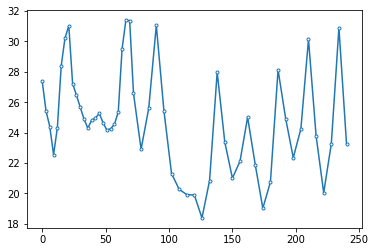

In [33]:
plt.plot(df0, marker='o',markersize=3, markerfacecolor='w')
#plt.plot(df.loc['新乡'])
plt.show()

In [38]:
df.index.levels[0]

Index(['卫辉', '原阳', '封丘', '延津', '新乡', '获嘉', '辉县', '长垣'], dtype='object', name='station')

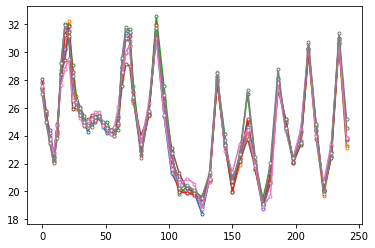

In [39]:
for station in df.index.levels[0]:
    plt.plot(df.loc[station],marker='o',markersize=3, markerfacecolor='w')
plt.show()